#### Goal of this script is to:
####  1| import and plot data in digestable ways
####  2| make new anova df for each participant 
####  3| fix supersaturation(?) - depends on how visual looks

In [1]:
# load packages
import numpy as np 
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime

In [20]:
NumBins = 6 # number of contrasts
NumHarms = 2 # number of harmonic data: 2F1, 4F1
NumComp = 0 # first component from RCA
NumConds = 4

nb = NumBins # makes plotting easier
pe = 0
po = 1

In [3]:
cp1 = sns.color_palette("husl", 8) # color pallete 1 
cp2 = sns.color_palette("hls", 8)  # color pallete 2
sns.set_theme() # set global plot theme
x_lev = np.arange(0,NumBins,1) # x ticks for plotting 

In [5]:
# Main Directory of processed file from MatLab
# MainDir = 'D:\\AttnXV3_analysis\\RCA_F1\\AvgCRFs\\' # set dir
MainDir = 'C:\\plimon\\LTP_analysis\\RCA_F1\\CleanCRFDiff\\' # set dir
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Files on hand: {d}')
##############################################
FileN = d[1] # choose one                        
file_path1 = os.path.join(MainDir, FileN) # join paths and prep 2 load
print('Current WD:',file_path1) # does path exist ... ?
print('Does File #1 Exist?',os.path.exists(file_path1)) # yes or no

Files on hand: ['AllClean_CRF_Diffs_20240312_1131.pkl', 'AllClean_CRF_Diffs_20240312_1328.pkl']
Current WD: C:\plimon\LTP_analysis\RCA_F1\CleanCRFDiff\AllClean_CRF_Diffs_20240312_1328.pkl
Does File #1 Exist? True


In [6]:
loadData = pkl.load(open(file_path1,'rb'))
print(loadData.keys())

diff_data = loadData['DiffData']
pp_data = loadData['PPData']
acrf = loadData['Avg']
eb = loadData['ErrorBars']
data_labels = loadData['DictMainKeys'] # condition labels for data + data_1s dict keys
contrast_levels = loadData['ContLevs'] # array for contrast labels (indexing)
contrast_labs = loadData['crfLabs'] # list for contrast labels (plotting)
note = loadData['VoiceMemo'] # personal note
print(note)

dict_keys(['DiffData', 'PPData', 'Avg', 'ErrorBars', 'VoiceMemo', 'DictMainKeys', 'ContLevs', 'crfLabs'])
['This data contains clean,processed (post-pre) contrast response function differences for each condition']


In [56]:
dd = diff_data[0] # post - pre data
m_dd = np.mean(dd[0],axis = 0)
std_dd = np.std(dd, axis = 0)
ResponseDiff_ErrBar = std_dd/np.sqrt(ns)

(12,)


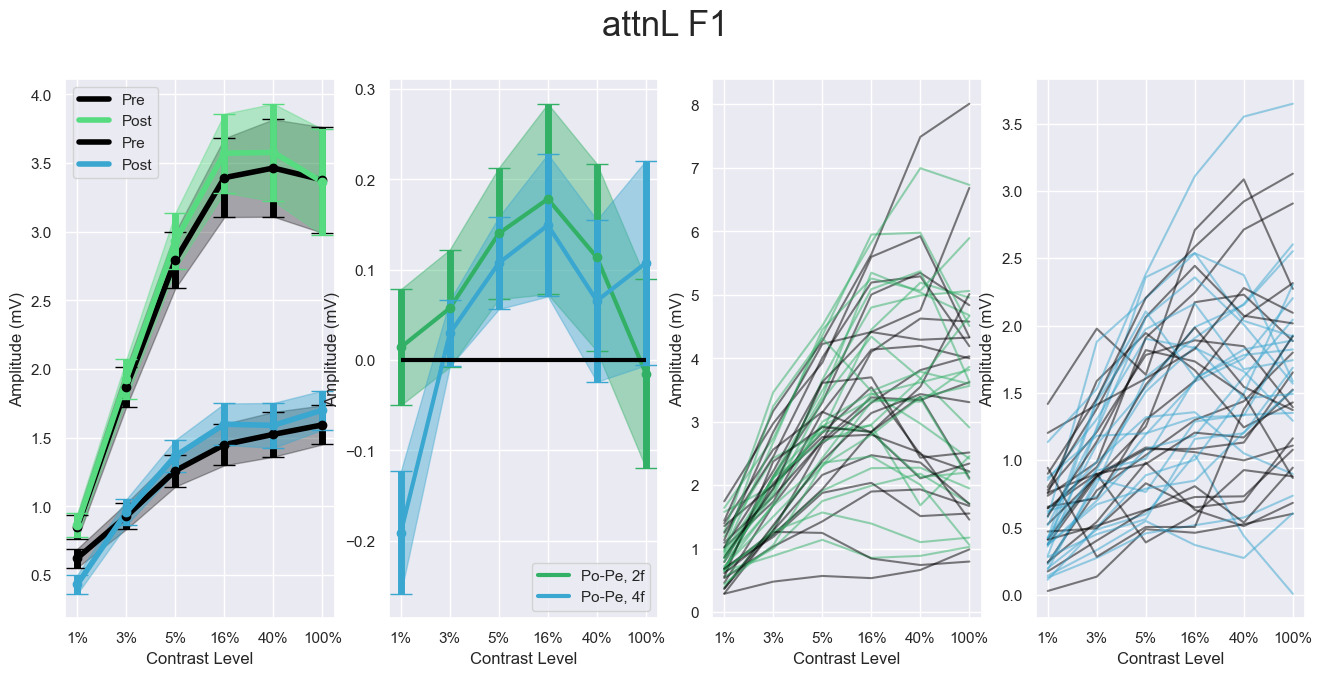

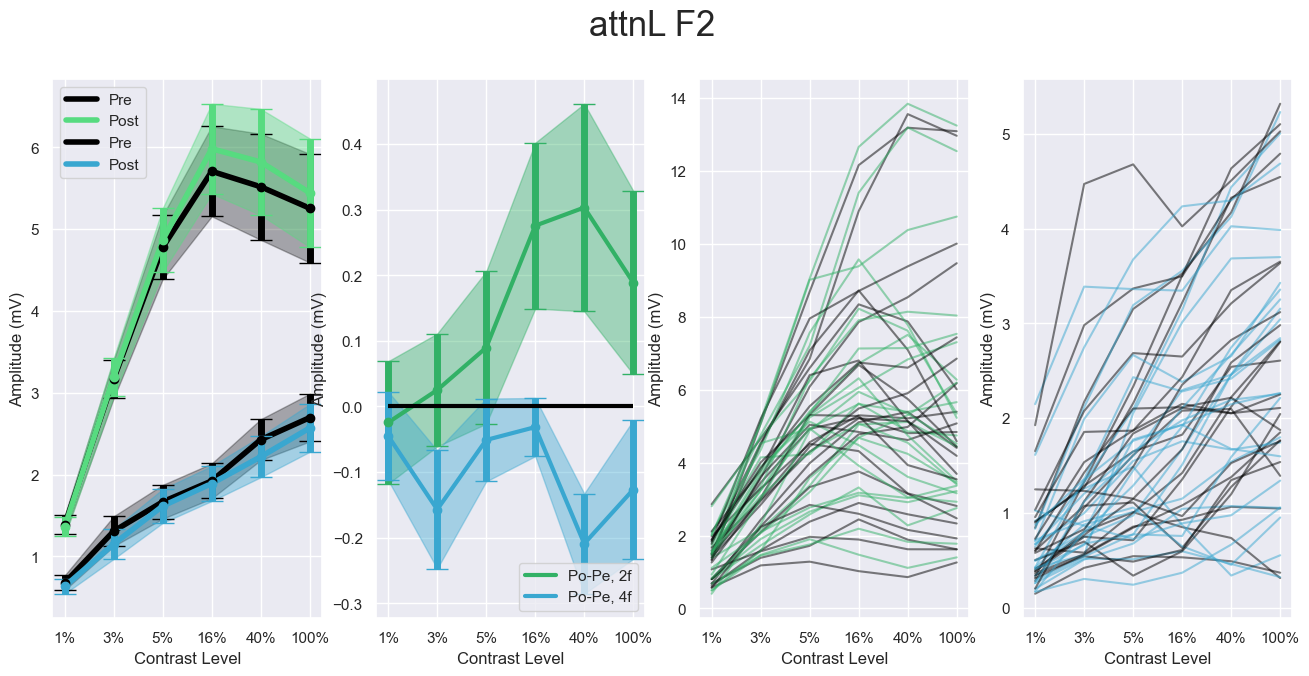

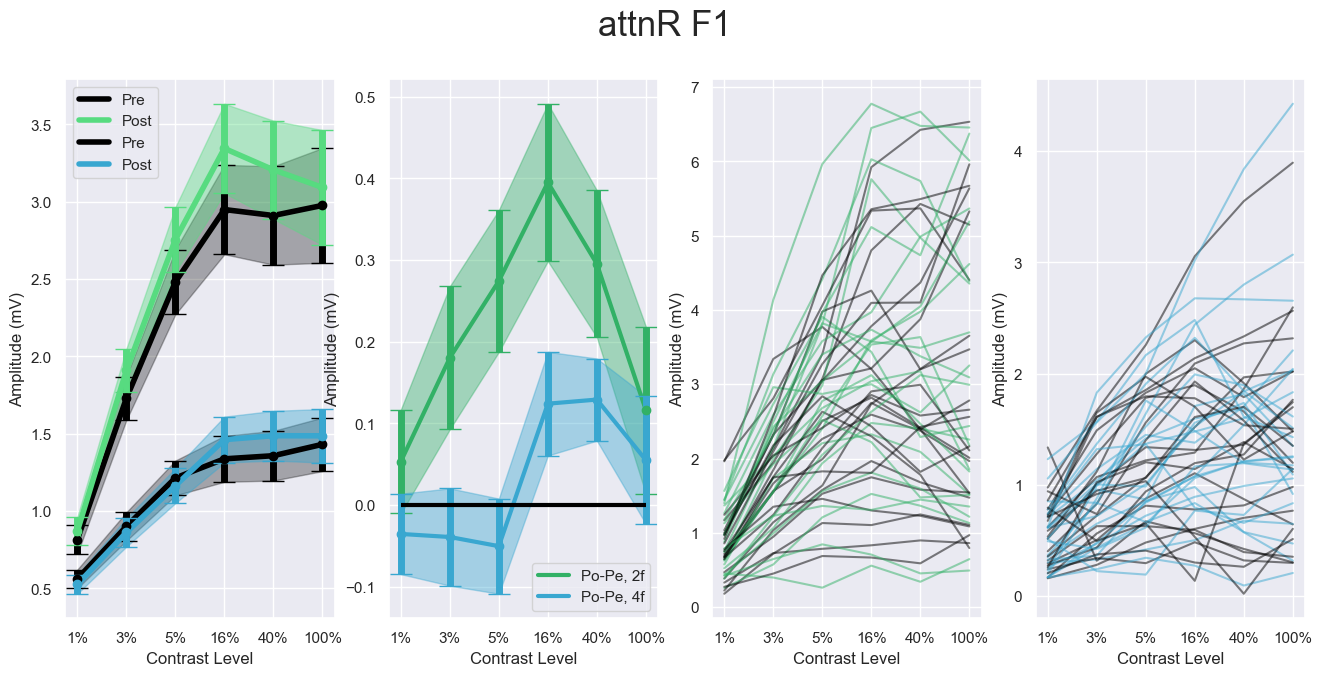

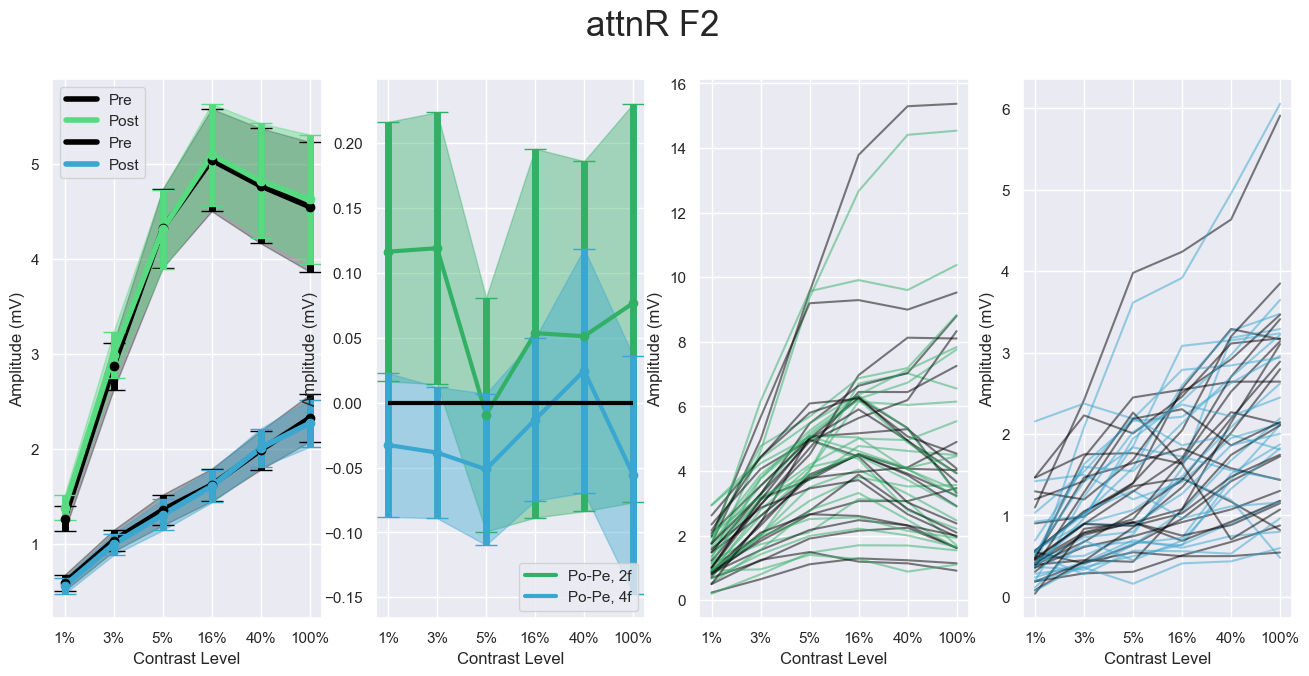

In [109]:
for co in range(NumConds):
    data = pp_data[co] # crf pre post data
    dd = diff_data[co] # post - pre data
    [ns,nc,nh] = data.shape

    m_dd = np.mean(dd,axis = 0)
    std_dd = np.std(dd, axis = 0)
    rdeb = std_dd/np.sqrt(ns) # response data error bars

    m_pre = np.mean(data[:,:,0],axis = 0,)
    m_post = np.mean(data[:,:,1],axis = 0)
    eb = np.zeros((NumHarms*NumBins,NumHarms))
    for pp in range(NumHarms):
        contrastMean = np.mean(data[:,:,pp], axis = 0)
        std = np.std(data[:,:,0],axis = 0)
        err_bar = std/np.sqrt(ns)
        eb[:,pp] = err_bar

    fig,axs = plt.subplots(1,4, figsize = (16,7), sharey = False)
    ### Fig #1 ###############################################################
    #pre 2f
    axs[0].plot(x_lev,m_pre[:nb], label = 'Pre', color = 'black',linewidth = 4)
    axs[0].errorbar(x_lev,m_pre[:nb],eb[:nb,pe],fmt = 'o', color = 'black', linewidth = 3,elinewidth=5,capsize = 8 )
    axs[0].fill_between(x_lev, m_pre[:nb] - eb[:nb,pe], m_pre[:nb] + eb[:nb,pe], color='black', alpha=0.3)
    # post 2f
    axs[0].plot(x_lev,m_post[:nb], label = 'Post', color = cp2[3], linewidth = 4)
    axs[0].errorbar(x_lev,m_post[:nb],eb[:nb,po],fmt = 'o', color = cp2[3], linewidth = 3,elinewidth=5,capsize = 8 )
    axs[0].fill_between(x_lev, m_post[:nb] - eb[:nb,po], m_post[:nb] + eb[:nb,po], color = cp2[3], alpha=0.4)
    # pre 4f 
    axs[0].plot(x_lev,m_pre[nb:], label = 'Pre', color = 'black',linewidth = 4)
    axs[0].errorbar(x_lev,m_pre[nb:],eb[nb:,pe],fmt = 'o', color = 'black', linewidth = 3,elinewidth=5,capsize = 8 )
    axs[0].fill_between(x_lev, m_pre[nb:] - eb[nb:,pe], m_pre[nb:] + eb[nb:,pe], color='black', alpha=0.3)
    # post 4f
    axs[0].plot(x_lev,m_post[nb:], label = 'Post', color = cp1[5], linewidth = 4)
    axs[0].errorbar(x_lev,m_post[nb:],eb[nb:,po],fmt = 'o', color = cp1[5], linewidth = 3,elinewidth=5,capsize = 8 )
    axs[0].fill_between(x_lev, m_post[nb:] - eb[nb:,po], m_post[nb:] + eb[nb:,po], color = cp1[5], alpha=0.4)

    axs[0].legend()

    for sIn in range(ns):
    ### Fig #2 #################################################################
        axs[2].plot(data[sIn,:6,0], color = 'black', label = 'pre', alpha = 0.5)
        axs[2].plot(data[sIn,:6,1], color = cp1[3], label = 'post', alpha = 0.5)

        axs[3].plot(data[sIn,6:,0], color = 'black', label = 'pre', alpha = 0.5)
        axs[3].plot(data[sIn,6:,1], color = cp1[5], label = 'post', alpha = 0.5)

    axs[0].set_xticks(ticks = np.arange(NumBins),labels = contrast_labs)
    axs[0].set_xlabel('Contrast Level')
    axs[0].set_ylabel('Amplitude (mV)')

    axs[2].set_xticks(ticks = np.arange(NumBins),labels = contrast_labs)
    axs[2].set_xlabel('Contrast Level')
    axs[2].set_ylabel('Amplitude (mV)')

    axs[3].set_xticks(ticks = np.arange(NumBins),labels = contrast_labs)
    axs[3].set_xlabel('Contrast Level')
    axs[3].set_ylabel('Amplitude (mV)')

    axs[1].plot(m_dd[:nb], label = 'Po-Pe, 2f', color = cp1[3], linewidth = 3)
    axs[1].errorbar(x_lev,m_dd[:nb],rdeb[:nb],fmt = 'o', color = cp1[3], linewidth = 3,elinewidth=5,capsize = 8 )
    axs[1].fill_between(x_lev, m_dd[:nb] - rdeb[:nb], m_dd[:nb] + rdeb[:nb], color = cp1[3], alpha=0.4)
    axs[1].plot(m_dd[nb:], label = 'Po-Pe, 4f', color = cp1[5], linewidth = 3)
    axs[1].errorbar(x_lev,m_dd[nb:],rdeb[nb:],fmt = 'o', color = cp1[5], linewidth = 3,elinewidth=5,capsize = 8 )
    axs[1].fill_between(x_lev, m_dd[nb:] - rdeb[nb:], m_dd[nb:] + rdeb[nb:], color = cp1[5], alpha=0.4)
    axs[1].hlines(0, xmin = 0, xmax = 5, color = 'black', linewidth = 3)
    axs[1].set_xticks(ticks = np.arange(NumBins),labels = contrast_labs)
    axs[1].set_xlabel('Contrast Level')
    axs[1].set_ylabel('Amplitude (mV)')
    axs[1].legend(loc = 'lower right')

    plt.suptitle(f'{data_labels[co]}', fontsize = 25)
    #plt.tight_layout

# might as well fix uper saturation for Naka Rushton simultation 
# make data array into data frame try for post - pre and for diffs too

In [69]:
test = pp_data[0]
[d1,d2,d3]  = test.shape
print(test.shape)

(22, 12, 2)


In [103]:
for sIn in range(NumHarms):
    #crfIn = test[sIn,0:6,0] # 
    hs = (sIn)+((NumBins-1)*sIn)# harmonic index end 
    he = ((sIn+1)*NumBins)# harmonic index start
    print(hs,he)


0 6
6 12
